# NOTE:
## In this notebook we will learn about the Perceptron trick for the classifiction

## Step 1: randomly pick a point
## Step 2: Predict the output for it then comapre with the original output if the point is miclassified then move the classifiction line to that point
## **Case - I :** if the point is positive and misclassified as negative then take the coodinates of the point subtract the coordinate from the original equations coefficeint
## **Case - II :** if the point is neagtive and misclassified as positive then take the coodinates of the point add the  coordinate to the original equations coefficeint


In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [57]:
from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=10)

In [58]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.show()

<IPython.core.display.Javascript object>

In [59]:
def step(num):
  return 1 if num>0 else 0

In [32]:
  X.shape

(100, 2)

In [40]:
# create the perceptron trick function

def perceptron(X,y):
  X= np.insert(X,0,1,axis= 1)
  weights = np.ones(X.shape[1])
  lr = 0.1

  for i in range(1000):
    j = np.random.randint(0,100)

    y_hat = step(np.dot(X[j],weights))
    weights = weights + lr*(y[j]-y_hat)*X[j]

  return weights[0] , weights[1:]


In [41]:
intercept_,coef_ = perceptron(X,y)

In [42]:
intercept_,coef_

(0.9, array([1.36272159, 0.05421389]))

In [43]:
# not find the m and b
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [44]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

(-3.0, 2.0)

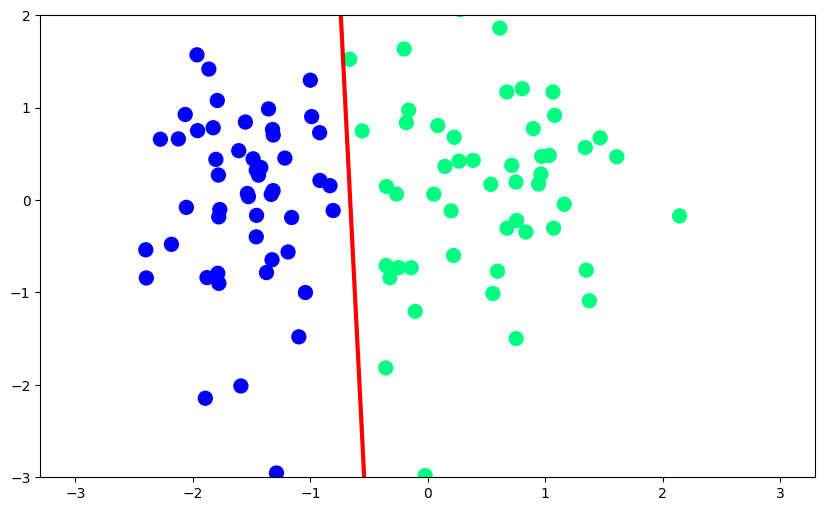

In [45]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)


In [64]:
def perceptron(X,y):

    m = []
    b = []

    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1

    for i in range(200):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]

        m.append(-(weights[1]/weights[2]))
        b.append(-(weights[0]/weights[2]))

    return m,b

In [65]:
m,b = perceptron(X,y)

In [66]:
%matplotlib notebook
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

In [67]:
fig, ax = plt.subplots(figsize=(9,5))

x_i = np.arange(-3, 3, 0.1)
y_i = x_i*m[0] +b[0]
ax.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
line, = ax.plot(x_i, x_i*m[0] +b[0] , 'r-', linewidth=2)
plt.ylim(-3,3)
def update(i):
    label = 'epoch {0}'.format(i + 1)
    line.set_ydata(x_i*m[i] + b[i])
    ax.set_xlabel(label)
    # return line, ax

anim = FuncAnimation(fig, update, repeat=True, frames=200, interval=100)

<IPython.core.display.Javascript object>

## From logistic regression

In [68]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression()
lor.fit(X,y)


LogisticRegression()

In [69]:
m = -(lor.coef_[0][0]/lor.coef_[0][1])
b = -(lor.intercept_/lor.coef_[0][1])

In [70]:
x_input1 = np.linspace(-3,3,100)
y_input1 = m*x_input + b

In [73]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)
plt.show()

<IPython.core.display.Javascript object>